<a href="https://colab.research.google.com/github/cgh1992/Rainfall-Prediction-in-Shenzhen/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 15kB/s 
     |████████████████████████████████| 3.0MB 51.7MB/s 
     |████████████████████████████████| 460kB 53.2MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [4]:
X = np.load('/content/drive/My Drive/Project/data/train_img_forCNN.npy')
y = np.load('/content/drive/My Drive/Project/data/train_label_forCNN.npy')
X_train = X
del X

In [5]:
y.shape

(8000,)

In [6]:
y_train = []
for i in range(len(y)):
  for j in range(15):
    y_train.append(y[i])

In [7]:
y_train = np.array(y_train)
y_train.shape

(120000,)

In [8]:
del y

In [9]:
X_train.shape

(8000, 15, 101, 101)

In [10]:
X_train = X_train.reshape(120000,101,101,1)

In [11]:
'''index = [i for i in range(len(y_train))]  
np.random.shuffle(index)

X_train = X_train[index]
y_train = y_train[index]'''

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras import metrics,applications

from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [12]:
tf.__version__

'2.2.0'

In [13]:
base_model = applications.ResNet101(
    include_top=False,
    weights=None,
    input_shape=(101,101,1),
    pooling=None,  
)
x = base_model.output
x = Flatten()(x)
predictions = Dense(1)(x)
model = Model(inputs = base_model.input, outputs = predictions)
opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= opt,metrics=[metrics.mse,metrics.mae])
#model.summary()

In [14]:
mod_rec50 = model.fit(X_train,y_train,batch_size=128,epochs=25,validation_split=0.2)

Epoch 1/25
750/750 [==============================] - 230s 307ms/step - loss: 226.8228 - mean_squared_error: 226.8228 - mean_absolute_error: 11.8087 - val_loss: 230.8938 - val_mean_squared_error: 230.8938 - val_mean_absolute_error: 11.8011
Epoch 2/25
750/750 [==============================] - 228s 304ms/step - loss: 167.0257 - mean_squared_error: 167.0257 - mean_absolute_error: 9.8773 - val_loss: 181.8618 - val_mean_squared_error: 181.8618 - val_mean_absolute_error: 9.8953
Epoch 3/25
750/750 [==============================] - 228s 304ms/step - loss: 127.3944 - mean_squared_error: 127.3944 - mean_absolute_error: 8.4408 - val_loss: 601.1626 - val_mean_squared_error: 601.1626 - val_mean_absolute_error: 12.9181
Epoch 4/25
750/750 [==============================] - 228s 304ms/step - loss: 98.9589 - mean_squared_error: 98.9589 - mean_absolute_error: 7.2666 - val_loss: 146.0978 - val_mean_squared_error: 146.0978 - val_mean_absolute_error: 8.7138
Epoch 5/25
750/750 [===========================

In [ ]:
np.save('/content/drive/My Drive/Project/model_epoch20_batchsize16_ResNet50.npy',mod_rec50.history)

In [ ]:
model.save('/content/drive/My Drive/Project/model_epoch25_batchsize128_ResNet50.h5')

In [ ]:
base_model_2 = applications.ResNet50(
    include_top=False,
    weights=None,
    input_shape=(101,101,1),
    pooling=None,  
)
x_2 = base_model_2.output
x_2 = Flatten()(x_2)
predictions_2 = Dense(1)(x_2)
model_2 = Model(inputs = base_model_2.input, outputs = predictions_2)
checkpoint = ModelCheckpoint('/content/drive/My Drive/Project/model_best_ResNet50_2.h5', monitor='val_loss',verbose=1, 
                            save_best_only=True)
opt2 = keras.optimizers.Adam(0.001)
model_2.compile(loss='mean_squared_error', optimizer=opt2,metrics=[metrics.mse,metrics.mae])
#model.summary()

In [ ]:
mod_rec50_2 = model_2.fit(X_train,y_train,batch_size=128,epochs=40,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/40
750/750 [==============================] - ETA: 0s - loss: 213.0572 - mean_squared_error: 213.0572 - mean_absolute_error: 11.3716
Epoch 00001: val_loss improved from inf to 262.85806, saving model to /content/drive/My Drive/Project/model_best_ResNet50_2.h5
750/750 [==============================] - 139s 185ms/step - loss: 213.0572 - mean_squared_error: 213.0572 - mean_absolute_error: 11.3716 - val_loss: 262.8581 - val_mean_squared_error: 262.8581 - val_mean_absolute_error: 11.8014
Epoch 2/40
750/750 [==============================] - ETA: 0s - loss: 150.8204 - mean_squared_error: 150.8204 - mean_absolute_error: 9.3676
Epoch 00002: val_loss improved from 262.85806 to 174.57669, saving model to /content/drive/My Drive/Project/model_best_ResNet50_2.h5
750/750 [==============================] - 140s 186ms/step - loss: 150.8204 - mean_squared_error: 150.8204 - mean_absolute_error: 9.3676 - val_loss: 174.5767 - val_mean_squared_error: 174.5767 - val_mean_absolute_error: 10.0161
Ep

In [ ]:
np.save('/content/drive/My Drive/Project/model_best_ResNet50_2.npy',mod_rec50_2.history)

In [ ]:
model_2.save('/content/drive/My Drive/Project/model_epoch10_batchsize128_ResNet50.h5')

In [ ]:
base_model_3 = applications.ResNet152(
    include_top=False,
    weights=None,
    input_shape=(101,101,1),
    pooling=None,  
)
x_3 = base_model_3.output
x_3 = Flatten()(x_3)
predictions_3 = Dense(1)(x_3)
model_3 = Model(inputs = base_model_3.input, outputs = predictions_3)

opt3 = keras.optimizers.Adam()
model_3.compile(loss='mean_squared_error', optimizer=opt3,metrics=[metrics.mse,metrics.mae])
#model.summary()

In [ ]:
mod_rec50_3 = model_3.fit(X_train,y_train,batch_size=128,epochs=25,validation_split=0.2)

Epoch 1/25
750/750 [==============================] - 327s 436ms/step - loss: 229.7443 - mean_squared_error: 229.7443 - mean_absolute_error: 11.8675 - val_loss: 276.8136 - val_mean_squared_error: 276.8136 - val_mean_absolute_error: 14.0528
Epoch 2/25
750/750 [==============================] - 325s 433ms/step - loss: 177.7192 - mean_squared_error: 177.7192 - mean_absolute_error: 10.2499 - val_loss: 756.1612 - val_mean_squared_error: 756.1612 - val_mean_absolute_error: 16.5760
Epoch 3/25
750/750 [==============================] - 324s 433ms/step - loss: 143.7924 - mean_squared_error: 143.7924 - mean_absolute_error: 9.0312 - val_loss: 1263.6245 - val_mean_squared_error: 1263.6245 - val_mean_absolute_error: 19.2267
Epoch 4/25
750/750 [==============================] - 324s 433ms/step - loss: 117.8854 - mean_squared_error: 117.8854 - mean_absolute_error: 8.0105 - val_loss: 184.2983 - val_mean_squared_error: 184.2983 - val_mean_absolute_error: 8.5720
Epoch 5/25
750/750 [=====================

In [ ]:
np.save('/content/drive/My Drive/Project/model_epoch20_batchsize16_ResNet152.npy',mod_rec50_3.history)

In [ ]:
mod_rec50_3.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])

In [ ]:
model_3.save('/content/drive/My Drive/Project/model_epoch40_batchsize128_ResNet50.h5')

In [ ]:
    mse         = mod_rec50_3.history['mean_squared_error']
    mae         = mod_rec50_3.history['mean_absolute_error']
    val_mse     = mod_rec50_3.history['val_mean_squared_error']
    val_mae     = mod_rec50_3.history['val_mean_absolute_error']
    epochs       = range(len(mse))
    nb_epochs    = len(epochs)

In [ ]:
import matplotlib.pyplot as plt


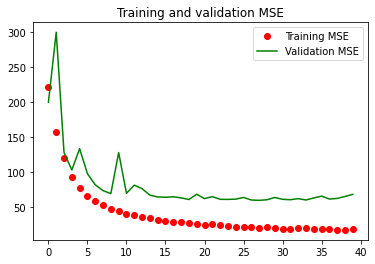

In [ ]:
    f2 = plt.figure(2)

    #plt.axis((0,nb_epochs,0,1.2))
    plt.plot(epochs, mse, 'ro', label='Training MSE')
    #plt.plot(epochs, mae, 'r--', label='Training MAE')
    plt.plot(epochs, val_mse, 'g-', label='Validation MSE')
    #plt.plot(epochs, val_mae, 'g^', label='Validation MAE')
    plt.title('Training and validation MSE')
    plt.legend()
    #plt.draw()
    plt.pause(0.001)
    plt.show()

In [ ]:
X_test = np.load('/content/drive/My Drive/Project/test_img_forCNN.npy')
y_t = np.load('/content/drive/My Drive/Project/test_label_forCNN.npy')
#X_test = X_test[:,:,3,:]
y_test = []
for i in range(len(y_t)):
  for j in range(15):
    y_test.append(y_t[i])
del y_t
y_test = np.array(y_test)


In [ ]:
X_test.shape

(2000, 15, 101, 101)

In [ ]:
X_test =X_test.reshape(30000,101,101,1)

In [ ]:
ev = model.evaluate(X_test,y_test)
ev

938/938 [==============================] - 31s 33ms/step - loss: 130.2773 - mean_squared_error: 130.2773 - mean_absolute_error: 7.3952


[130.27731323242188, 130.27731323242188, 7.395173072814941]

In [ ]:
ev2 = model_2.evaluate(X_test,y_test)
ev2

938/938 [==============================] - 18s 19ms/step - loss: 130.5832 - mean_squared_error: 130.5832 - mean_absolute_error: 7.5437


[130.58322143554688, 130.58322143554688, 7.543656349182129]

In [ ]:
ev3 = model_3.evaluate(X_test,y_test)
ev3

938/938 [==============================] - 43s 46ms/step - loss: 132.4105 - mean_squared_error: 132.4105 - mean_absolute_error: 7.3898


[132.41049194335938, 132.41049194335938, 7.389822006225586]

In [ ]:
test_mse = ev2[1]
test_mae = ev2[2]

In [ ]:
model.predict(X_test[99].reshape(1,101,101,1))

array([[4.238598]], dtype=float32)

In [ ]:
len(X_test)

30000

In [ ]:
    val_mse1     = mod_rec50.history['val_mean_squared_error']
    val_mae1     = mod_rec50.history['val_mean_absolute_error']
    epochs1        = range(len(val_mse1))
    nb_epochs1    = len(epochs1)
    val_mse2     = mod_rec50_2.history['val_mean_squared_error']
    val_mae2     = mod_rec50_2.history['val_mean_absolute_error']
    epochs2       = range(len(val_mse2))
    nb_epochs2    = len(epochs2)
    val_mse3     = mod_rec50_3.history['val_mean_squared_error']
    val_mae3     = mod_rec50_3.history['val_mean_absolute_error']
    epochs3       = range(len(val_mse3))
    nb_epochs3    = len(epochs3)

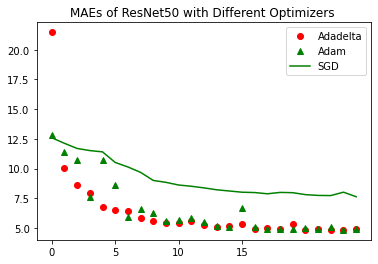

In [ ]:
    f1 = plt.figure(1)
    #epochs = range(0,20)
    #plt.axis((0,nb_epochs3,0,1.2))
    plt.xticks(np.arange(0,20,5))
    plt.plot(epochs1, val_mae1, 'ro', label='Adadelta')
    plt.plot(epochs2, val_mae2, 'g^', label='Adam')
    plt.plot(epochs3, val_mae3, 'g-', label='SGD')
    #plt.plot(epochs, resnet152_mae, 'g^', label='resnet152_mae')
    plt.title('MAEs of ResNet50 with Different Optimizers ')
    plt.legend()
    #plt.draw()
    plt.pause(0.001)
    plt.show()

In [ ]:
model4 = load_model('/content/drive/My Drive/Project/model_best_ResNet50_2.h5')

In [ ]:
ev4 = model4.evaluate(X_test,y_test)
ev4

938/938 [==============================] - 18s 19ms/step - loss: 123.3314 - mean_squared_error: 123.3314 - mean_absolute_error: 7.2625


[123.3314437866211, 123.3314437866211, 7.262516498565674]

In [ ]:
model5 = load_model('/content/drive/My Drive/Project/model_best_ResNet50_2.h5')

In [ ]:
mseaaaaa= [123.3314437866211,130.27731323242188,132.4104919433593,147.71649169921875]
maeaaaaa= [7.262516498565674,7.39517307281494,7.389822006225586,8.949355125427246]

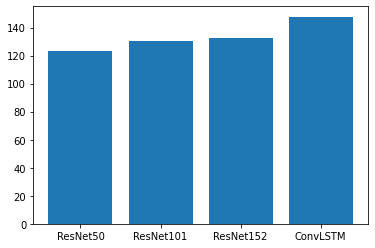

In [ ]:
f9=plt.figure()
plt.bar(range(4),mseaaaaa,tick_label=['ResNet50','ResNet101','ResNet152','ConvLSTM'])
plt.show()

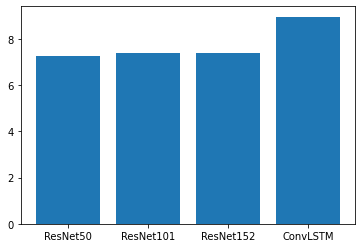

In [ ]:
f9=plt.figure()
plt.bar(range(4),maeaaaaa,tick_label=['ResNet50','ResNet101','ResNet152','ConvLSTM'])
plt.show()